# AIA data download and analysis

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

import sunpy.map
from sunpy.instr.aia import aiaprep
from sunpy.net import Fido, attrs as a

from astropy.coordinates import SkyCoord
from astropy import units as u

import warnings
warnings.filterwarnings("ignore")

Sets the initial time and final time to search for data in SDO repository via a FIDO search client.

In [22]:
result = Fido.search(a.Time('2014-09-19T05:59:00', '2014-09-19T06:01:00'), 
                     a.Instrument("aia"), a.Wavelength(171*u.angstrom), 
                     a.vso.Sample(12*u.second))

Download one segment of the data onto local machine.

In [23]:
file_download = Fido.fetch(result[0, 3], site='ROB')

Read downloaed file in Map form.

In [5]:
aia1 = sunpy.map.Map(file_download[0])

Prepare the Map (Correct for rotation and revolution if needed)

In [6]:
aia = aiaprep(aia1)

Finaly Plot the data

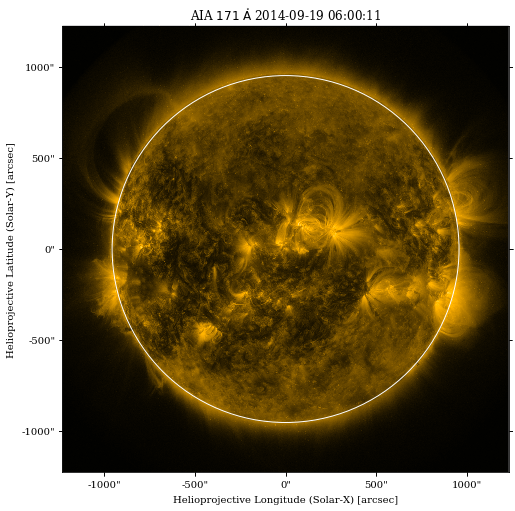

In [19]:
plt.rc('font',family='serif')
plt.figure(figsize=[8,10])
aia.plot()
aia.draw_limb()
plt.grid(False)
#plt.colorbar()
plt.show()